In [35]:
%pylab inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('v2CarSalesYTDSep2019.csv')

In [3]:
data = data.dropna(how='all',axis=1)

In [4]:
data.head()

,MAKE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP
0,ALFA ROMEO,17.0,9.0,19.0,12.0,11.0,5.0,15.0,12.0,6.0
1,ASTON MARTIN,7.0,3.0,7.0,5.0,3.0,3.0,2.0,3.0,4.0
2,AUDI,111.0,120.0,157.0,98.0,125.0,161.0,147.0,176.0,175.0
3,BENTLEY,11.0,4.0,10.0,4.0,4.0,2.0,3.0,4.0,6.0
4,BMW,130.0,163.0,178.0,109.0,139.0,159.0,116.0,163.0,169.0


In [5]:
def count_rows(rows):
    return len(rows)

In [6]:
data_unpivoted = data.melt(id_vars=['MAKE'],var_name='Month',value_name = 'NumberOfSales')

In [7]:
data_unpivoted.head()

,MAKE,Month,NumberOfSales
0,ALFA ROMEO,JAN,17.0
1,ASTON MARTIN,JAN,7.0
2,AUDI,JAN,111.0
3,BENTLEY,JAN,11.0
4,BMW,JAN,130.0


# Nissan VS Honda VS Mazda Sales YTD 2019

''

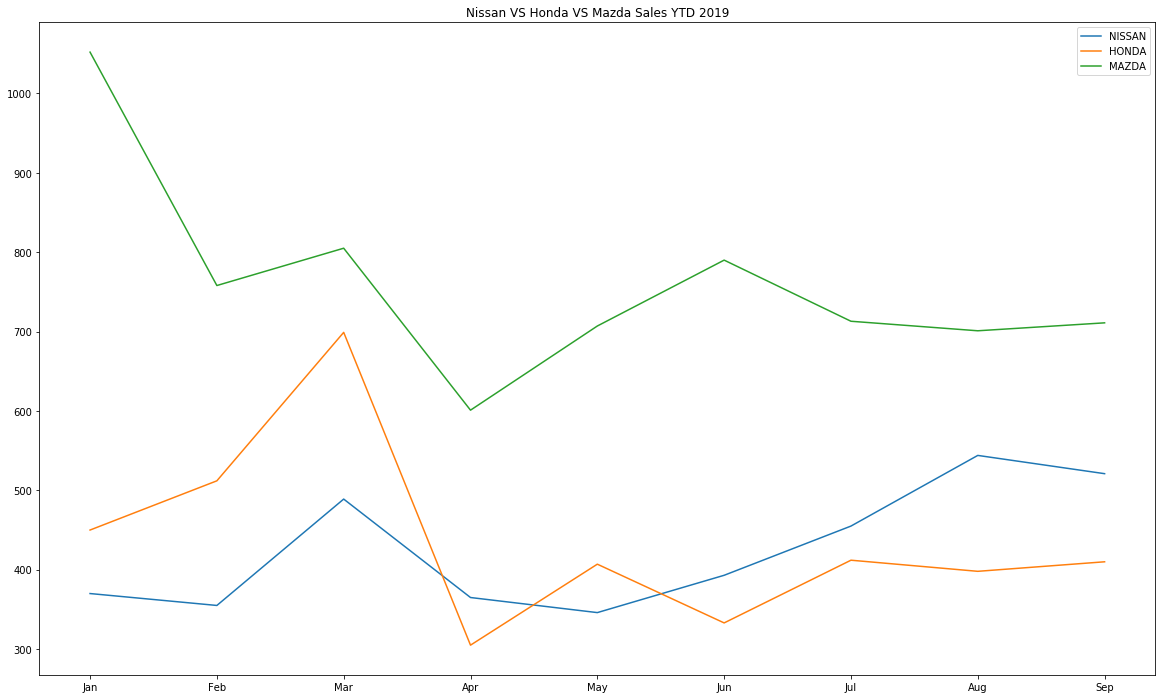

In [129]:
n = data_unpivoted[data_unpivoted.MAKE == 'NISSAN']
h = data_unpivoted[data_unpivoted.MAKE == 'HONDA']
m = data_unpivoted[data_unpivoted.MAKE == 'MAZDA']

plt.title('Nissan VS Honda VS Mazda Sales YTD 2019')
plt.plot(n.Month,n.NumberOfSales,label='NISSAN')
plt.plot(h.Month,h.NumberOfSales,label='HONDA')
plt.plot(m.Month,m.NumberOfSales,label='MAZDA')
plt.legend()
;

# Add a Month Number column to sort data by Month

In [8]:
data_unpivoted['Month'] = data_unpivoted['Month'].str.title()

In [9]:
months = {datetime.datetime(2000,i,1).strftime("%b"): i for i in range(1, 13)} #create a month dict for mapping

In [10]:
data_unpivoted['MonthNo'] = data_unpivoted['Month'].map(months)

# Number of Sales by Month

''

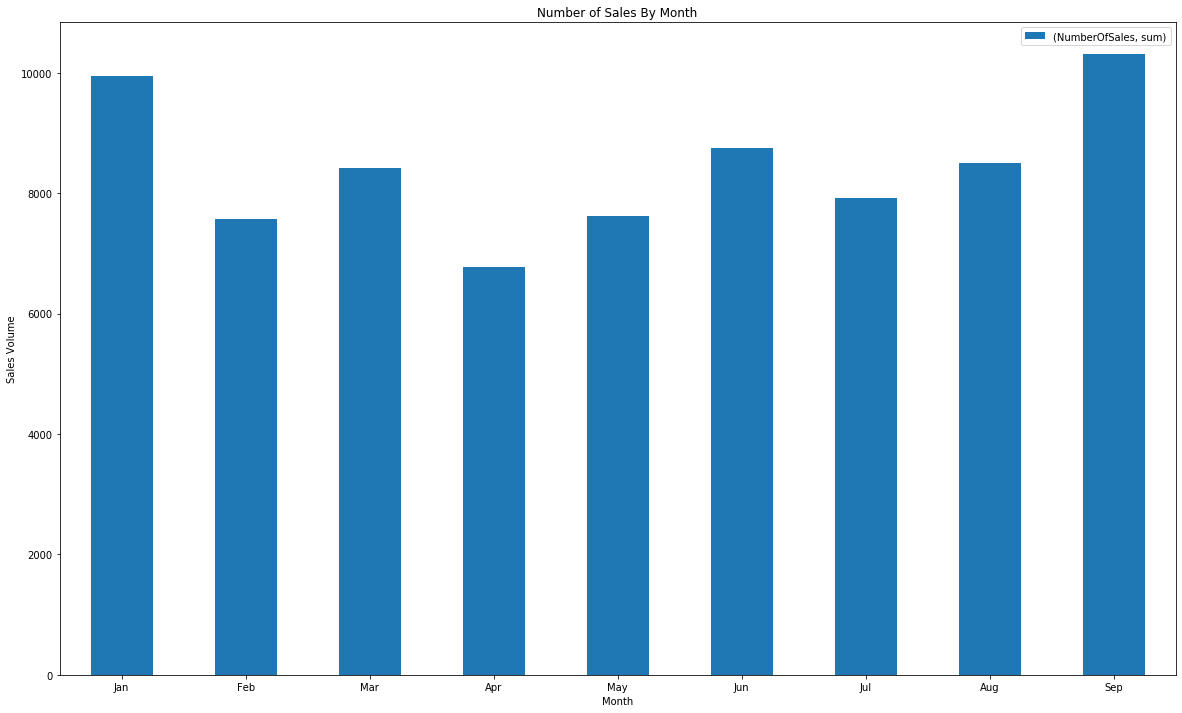

In [131]:
month_plot = data_unpivoted.groupby(['MonthNo']).agg({'NumberOfSales':['sum']}).plot(kind='bar')
month_plot.set_title('Number of Sales By Month')
month_plot.set_xlabel('Month')
month_plot.set_ylabel('Sales Volume')
xticks(range(9),'Jan Feb Mar Apr May Jun Jul Aug Sep'.split(),rotation = 0)
legend(loc='best')
;

# Number of Sales by Car Maker

''

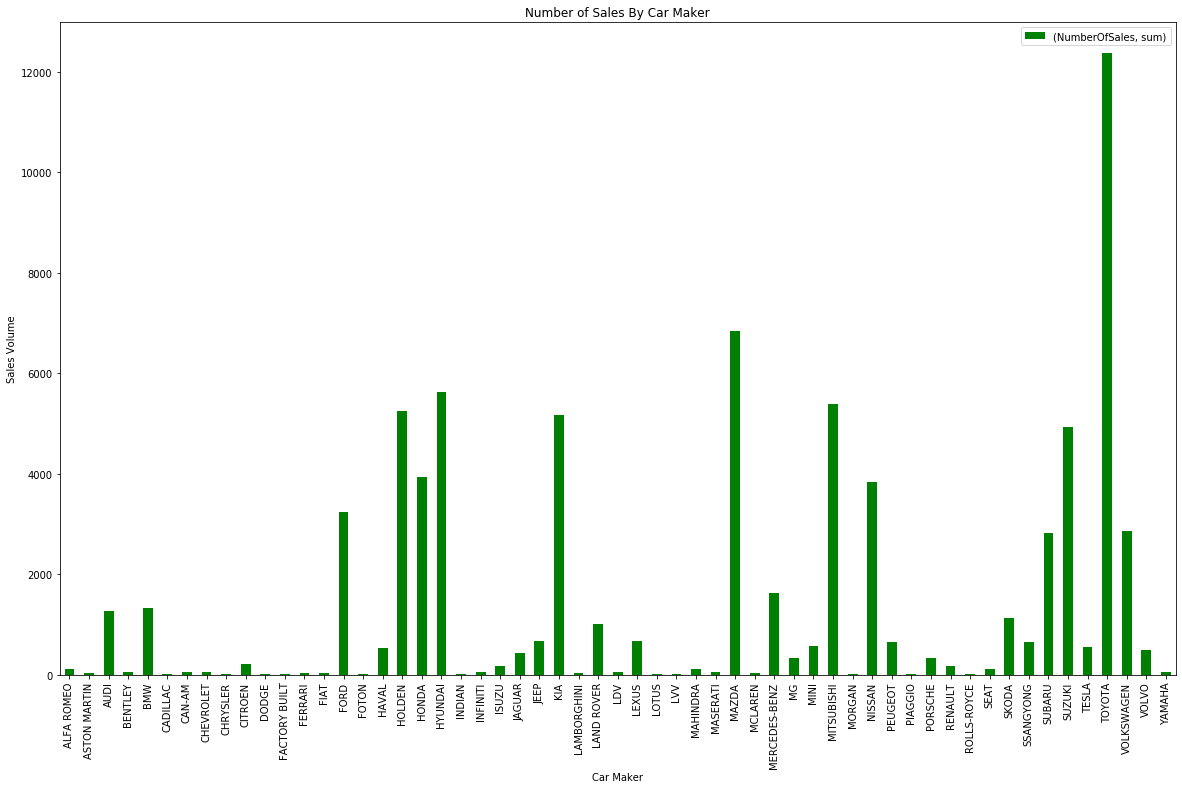

In [31]:
make_plot = data_unpivoted.groupby(['MAKE']).agg({'NumberOfSales':['sum']}).plot(kind='bar', color='green')
make_plot.set_title('Number of Sales By Car Maker')
make_plot.set_xlabel('Car Maker')
make_plot.set_ylabel('Sales Volume')
#xticks(range(9),'Jan Feb Mar Apr May Jun Jul Aug Sep'.split(),rotation = 0)
#month_plot.legend('ABCD')
legend(loc='best')
;